# Import libraries and data

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn libraries
from sklearn.preprocessing import LabelEncoder

# Import warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Fetch data
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Montreal Crime Data.csv  


In [3]:
# Create DataFrame based on data
crimes = pd.read_csv('Montreal Crime Data.csv')
crimes

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
...,...,...,...,...,...,...,...,...,...,...
136637,136637,Motor vehicle theft,2020-03-25,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136638,136638,Motor vehicle theft,2020-03-27,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136639,136639,Mischief,2021-04-01,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452
136640,136640,Home Invasion,2021-06-06,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452


## Dataset Overview
|    category   | Type of crime committed           |
|:-------------:|-----------------------------------|
|      date     | Date crime occured                |
|  postal_code  | Postal Code where event occured   |
|      city     | City where crime occured          |
| neighbourhood | Neighbourhood where crime occured |
|      year     | Year it occured                   |
|     count     | Count                             |
|   longitutde  | Longitude                         |
|    latitude   | Latitude                          |

# Data Preprocessing

In [4]:
# Check whether rows contain Null
crimes.isnull().sum()

Unnamed: 0       0
category         0
date             0
postal_code      0
city             0
neighbourhood    0
year             0
count            0
longitude        0
latitude         0
dtype: int64

In [5]:
# Check whether rows contain NaN
crimes.isna().sum()

Unnamed: 0       0
category         0
date             0
postal_code      0
city             0
neighbourhood    0
year             0
count            0
longitude        0
latitude         0
dtype: int64

## Check distribution of each features

### Category

0  :  ['Confirmed Theft']
1  :  ['Home Invasion']
2  :  ['Mischief']
3  :  ['Motor vehicle theft']
4  :  ['Offenses resulting in death']
5  :  ['Theft in / from a motor vehicle']


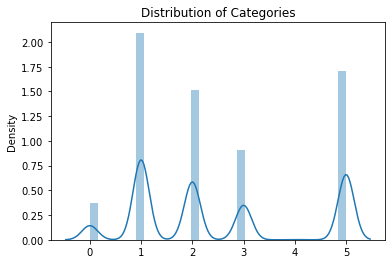

In [6]:
# Check the distribution of 'category'
categories = crimes['category']
le = LabelEncoder()
categories_le = le.fit_transform(categories)
plt.title('Distribution of Categories')
sns.distplot(categories_le)
labels = enumerate(range(0, 6, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

In [7]:
# As you can see that plot, density of 'Offenses resulting in death' is much lower than any other categories
# So, I think dropping that category can be a good idea.
drop_category_rows = crimes[crimes['category'] == 'Offenses resulting in death'].index
crimes.drop(drop_category_rows, inplace=True)
crimes

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
...,...,...,...,...,...,...,...,...,...,...
136637,136637,Motor vehicle theft,2020-03-25,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136638,136638,Motor vehicle theft,2020-03-27,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136639,136639,Mischief,2021-04-01,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452
136640,136640,Home Invasion,2021-06-06,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452


0  :  ['Confirmed Theft']
1  :  ['Home Invasion']
2  :  ['Mischief']
3  :  ['Motor vehicle theft']
4  :  ['Theft in / from a motor vehicle']


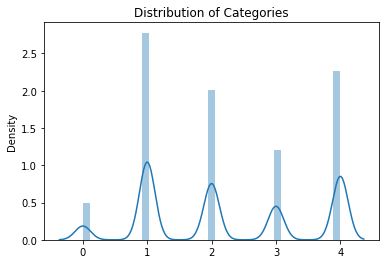

In [8]:
# RE-Check the distribution of 'category'
categories = crimes['category']
le = LabelEncoder()
categories_le = le.fit_transform(categories)
plt.title('Distribution of Categories')
sns.distplot(categories_le)
labels = enumerate(range(0, 5, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

### City

0  :  ['ANJOU']
1  :  ["BAIE-D'URFE"]
2  :  ['BEACONSFIELD']
3  :  ['COTE SAINT-LUC']
4  :  ['DOLLARD-DES-ORMEAUX']
5  :  ['DORVAL']
6  :  ['HAMPSTEAD']
7  :  ['KIRKLAND']
8  :  ["L'ILE-BIZARD"]
9  :  ['LACHINE']
10  :  ['LASALLE']
11  :  ['MONT-ROYAL']
12  :  ['MONTREAL']
13  :  ['MONTREAL-EST']
14  :  ['MONTREAL-NORD']
15  :  ['MONTREAL-OUEST']
16  :  ['OUTREMONT']
17  :  ['PIERREFONDS']
18  :  ['POINTE-AUX-TREMBLES']
19  :  ['POINTE-CLAIRE']
20  :  ['ROXBORO']
21  :  ['SAINT-LAURENT']
22  :  ['SAINT-LEONARD']
23  :  ['SAINTE-ANNE-DE-BELLEVUE']
24  :  ['SAINTE-GENEVIEVE']
25  :  ['SENNEVILLE']
26  :  ['VERDUN']
27  :  ['WESTMOUNT']


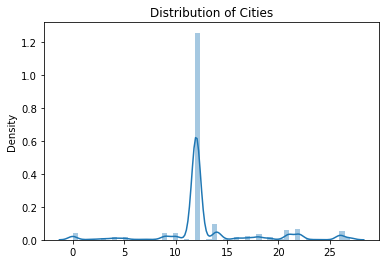

In [9]:
# Check the distribution of 'city'
cities = crimes['city']
le = LabelEncoder()
cities_le = le.fit_transform(cities)
plt.title('Distribution of Cities')
sns.distplot(cities_le)
labels = enumerate(range(0, 28, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

In [10]:
# Check how many 'postal code' has unique values
len_city_unique = len(crimes.city.unique())
print('The number of unique values: ', len_city_unique)
print('The proportion of unique values: ', round(len_city_unique / len(crimes['city']) * 100, 3),'%')

The number of unique values:  28
The proportion of unique values:  0.021 %


In [11]:
# As you can see that plot, density of 'Offenses resulting in death' is much lower than any other categories
# So, I think dropping that category can be a good idea.
drop_city_rows = crimes[crimes['city'] != 'MONTREAL'].index
crimes.drop(drop_city_rows, inplace=True)
crimes

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
...,...,...,...,...,...,...,...,...,...,...
136515,136515,Theft in / from a motor vehicle,2021-06-06,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501
136516,136516,Theft in / from a motor vehicle,2021-06-20,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501
136517,136517,Theft in / from a motor vehicle,2021-05-12,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501
136518,136518,Theft in / from a motor vehicle,2021-05-03,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501


### Neighbourhood

0  :  ['Ahuntsic']
1  :  ['Anjou']
2  :  ['Cartierville']
3  :  ['Centre-Sud']
4  :  ['Côte Saint-Luc']
5  :  ['Côte-des-Neiges']
6  :  ['Downtown Montreal']
7  :  ['Griffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)']
8  :  ['Hampstead / Côte Saint-Luc']
9  :  ['Hochelaga']
10  :  ['Maisonneuve']
11  :  ['Mercier']
12  :  ['Montreal East']
13  :  ['Montréal-Nord']
14  :  ['Mount Royal']
15  :  ['Notre-Dame-de-Grâce']
16  :  ['Old Montreal']
17  :  ['Outremont']
18  :  ['Parc-Extension']
19  :  ['Petite-Bourgogne']
20  :  ['Petite-Patrie']
21  :  ['Plateau Mont-Royal']
22  :  ['Pointe-Saint-Charles']
23  :  ['Pointe-aux-Trembles']
24  :  ['Rivière-des-Prairies']
25  :  ['Rosemont']
26  :  ['Saint-Henri']
27  :  ['Saint-Laurent']
28  :  ['Saint-Léonard']
29  :  ['Saint-Michel']
30  :  ['Saint-Michel,East']
31  :  ['Ville Émard']
32  :  ['Villeray']
33  :  ['Westmount']


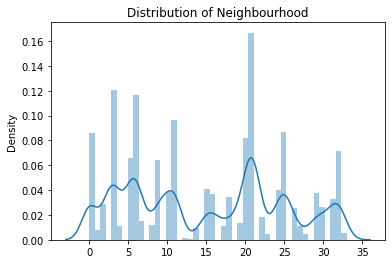

In [12]:
# Check the distribution of 'neighbourhood'
neighbour = crimes['neighbourhood']
le = LabelEncoder()
neighbourhood_le = le.fit_transform(neighbour)
plt.title('Distribution of Neighbourhood')
sns.distplot(neighbourhood_le)
labels = enumerate(range(0, 34, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

## Data Cleansing

In [13]:
# The proportion of unique values of city is too low as about 0%.
# Therefore, we can drop that feature.
# Drop unnecessary features
crimes.drop(['Unnamed: 0', 'postal_code', 'count', 'city'], axis=1, inplace=True)
crimes.reset_index(drop=True, inplace=True)
crimes

,category,date,neighbourhood,year,longitude,latitude
0,Motor vehicle theft,2018-09-13,Saint-Michel,2018,-73.626,45.567
1,Motor vehicle theft,2018-04-30,Saint-Michel,2018,-73.626,45.567
2,Home Invasion,2018-01-10,Saint-Michel,2018,-73.629,45.569
3,Mischief,2018-11-12,Saint-Michel,2018,-73.629,45.569
4,Mischief,2018-08-15,Saint-Michel,2018,-73.629,45.569
...,...,...,...,...,...,...
92581,Theft in / from a motor vehicle,2021-06-06,Downtown Montreal,2021,-73.562,45.501
92582,Theft in / from a motor vehicle,2021-06-20,Downtown Montreal,2021,-73.562,45.501
92583,Theft in / from a motor vehicle,2021-05-12,Downtown Montreal,2021,-73.562,45.501
92584,Theft in / from a motor vehicle,2021-05-03,Downtown Montreal,2021,-73.562,45.501


In [14]:
# Split date into year, month and day
crimes['date'] = pd.to_datetime(crimes['date'])
crimes['month'] = crimes['date'].dt.month
crimes['day'] = crimes['date'].dt.day
crimes

,category,date,neighbourhood,year,longitude,latitude,month,day
0,Motor vehicle theft,2018-09-13,Saint-Michel,2018,-73.626,45.567,9,13
1,Motor vehicle theft,2018-04-30,Saint-Michel,2018,-73.626,45.567,4,30
2,Home Invasion,2018-01-10,Saint-Michel,2018,-73.629,45.569,1,10
3,Mischief,2018-11-12,Saint-Michel,2018,-73.629,45.569,11,12
4,Mischief,2018-08-15,Saint-Michel,2018,-73.629,45.569,8,15
...,...,...,...,...,...,...,...,...
92581,Theft in / from a motor vehicle,2021-06-06,Downtown Montreal,2021,-73.562,45.501,6,6
92582,Theft in / from a motor vehicle,2021-06-20,Downtown Montreal,2021,-73.562,45.501,6,20
92583,Theft in / from a motor vehicle,2021-05-12,Downtown Montreal,2021,-73.562,45.501,5,12
92584,Theft in / from a motor vehicle,2021-05-03,Downtown Montreal,2021,-73.562,45.501,5,3


In [15]:
# Reloate column heads in custom
crimes = crimes[['year', 'month', 'day', 'latitude', 'longitude', 'neighbourhood', 'category']]
crimes

,year,month,day,latitude,longitude,neighbourhood,category
0,2018,9,13,45.567,-73.626,Saint-Michel,Motor vehicle theft
1,2018,4,30,45.567,-73.626,Saint-Michel,Motor vehicle theft
2,2018,1,10,45.569,-73.629,Saint-Michel,Home Invasion
3,2018,11,12,45.569,-73.629,Saint-Michel,Mischief
4,2018,8,15,45.569,-73.629,Saint-Michel,Mischief
...,...,...,...,...,...,...,...
92581,2021,6,6,45.501,-73.562,Downtown Montreal,Theft in / from a motor vehicle
92582,2021,6,20,45.501,-73.562,Downtown Montreal,Theft in / from a motor vehicle
92583,2021,5,12,45.501,-73.562,Downtown Montreal,Theft in / from a motor vehicle
92584,2021,5,3,45.501,-73.562,Downtown Montreal,Theft in / from a motor vehicle


In [16]:
# Sorting values by year, month, and day
crimes = crimes.sort_values(by=['year', 'month', 'day'], ascending=True)
crimes.reset_index(drop=True, inplace=True)
crimes

,year,month,day,latitude,longitude,neighbourhood,category
0,2015,1,1,45.518,-73.596,Outremont,Mischief
1,2015,1,1,45.522,-73.567,Centre-Sud,Home Invasion
2,2015,1,1,45.516,-73.554,Centre-Sud,Confirmed Theft
3,2015,1,1,45.598,-73.526,Mercier,Home Invasion
4,2015,1,1,45.544,-73.600,Petite-Patrie,Motor vehicle theft
...,...,...,...,...,...,...,...
92581,2021,8,20,45.579,-73.513,Mercier,Home Invasion
92582,2021,8,20,45.500,-73.585,Downtown Montreal,Mischief
92583,2021,8,20,45.538,-73.566,Plateau Mont-Royal,Confirmed Theft
92584,2021,8,20,45.538,-73.566,Plateau Mont-Royal,Motor vehicle theft


# Exploratory Data Analysis

In [17]:
# Create label encoded dataframe of 'crimes'
crimes_copy = crimes.copy()
crimes_copy

,year,month,day,latitude,longitude,neighbourhood,category
0,2015,1,1,45.518,-73.596,Outremont,Mischief
1,2015,1,1,45.522,-73.567,Centre-Sud,Home Invasion
2,2015,1,1,45.516,-73.554,Centre-Sud,Confirmed Theft
3,2015,1,1,45.598,-73.526,Mercier,Home Invasion
4,2015,1,1,45.544,-73.600,Petite-Patrie,Motor vehicle theft
...,...,...,...,...,...,...,...
92581,2021,8,20,45.579,-73.513,Mercier,Home Invasion
92582,2021,8,20,45.500,-73.585,Downtown Montreal,Mischief
92583,2021,8,20,45.538,-73.566,Plateau Mont-Royal,Confirmed Theft
92584,2021,8,20,45.538,-73.566,Plateau Mont-Royal,Motor vehicle theft


In [18]:
# Label encoding for 'neighbourhood' and 'category'
neighbourhood_copy = LabelEncoder()
category_copy = LabelEncoder()
crimes_copy['neighbourhood'] = neighbourhood_copy.fit_transform(crimes_copy['neighbourhood'])
crimes_copy['category'] = category_copy.fit_transform(crimes_copy['category'])
crimes_copy

,year,month,day,latitude,longitude,neighbourhood,category
0,2015,1,1,45.518,-73.596,17,2
1,2015,1,1,45.522,-73.567,3,1
2,2015,1,1,45.516,-73.554,3,0
3,2015,1,1,45.598,-73.526,11,1
4,2015,1,1,45.544,-73.600,20,3
...,...,...,...,...,...,...,...
92581,2021,8,20,45.579,-73.513,11,1
92582,2021,8,20,45.500,-73.585,6,2
92583,2021,8,20,45.538,-73.566,21,0
92584,2021,8,20,45.538,-73.566,21,3


In [19]:
# Create correlation dataframe
crimes_corr = crimes_copy.corr()
crimes_corr

,year,month,day,latitude,longitude,neighbourhood,category
year,1.000000,-0.092998,0.000838,-0.002110,0.007120,0.000450,0.047760
month,-0.092998,1.000000,-0.013382,0.012523,0.014287,0.000114,0.015242
day,0.000838,-0.013382,1.000000,-0.001901,-0.005052,0.001422,0.001430
latitude,-0.002110,0.012523,-0.001901,1.000000,0.220981,0.098444,0.031804
longitude,0.007120,0.014287,-0.005052,0.220981,1.000000,0.005799,-0.007989
neighbourhood,0.000450,0.000114,0.001422,0.098444,0.005799,1.000000,-0.002519
category,0.047760,0.015242,0.001430,0.031804,-0.007989,-0.002519,1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Montreal Crimes')

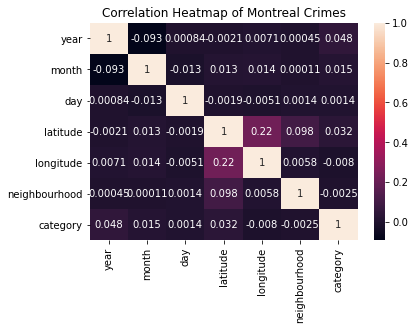

In [20]:
# Correlation Heatmap
sns.heatmap(data=crimes_corr, annot=True)
plt.title('Correlation Heatmap of Montreal Crimes')

## Groupby by year
Summary
1. The highest value of neighbourhood, category was Notre-Dame-de-Grâce and Mischief each.
2. June was the highest along the year and mid-Month(15th) was the highest on Month

In [21]:
# Groupping by year to analyze correlation
crimes_year = crimes_copy.groupby(by='year').mean()
crimes_year

,month,day,latitude,longitude,neighbourhood,category
year,,,,,,
2015,6.796666,15.633514,45.532566,-73.589632,15.217516,2.099770
2016,6.737906,15.798639,45.531407,-73.588662,14.871232,2.109731
2017,6.518149,15.908359,45.533255,-73.586429,14.845795,2.165389
2018,6.677041,15.850392,45.531135,-73.588883,14.904954,2.237425
2019,6.683934,15.856290,45.531410,-73.587779,15.137264,2.181746
2020,6.602636,15.918919,45.532740,-73.588959,15.319930,2.209335
2021,4.690240,15.409760,45.531961,-73.587624,14.747383,2.365629


In [22]:
# Create list which shape is int64 on purpose of inverse transform
neighbourhood_year_int = round(crimes_year['neighbourhood'], 0).astype(int)
category_year_int = round(crimes_year['category'], 0).astype(int)

In [23]:
# Inverse transform from label encoder
crimes_year['neighbourhood'] = neighbourhood_copy.inverse_transform(neighbourhood_year_int)
crimes_year['category'] = category_copy.inverse_transform(category_year_int)
crimes_year

,month,day,latitude,longitude,neighbourhood,category
year,,,,,,
2015,6.796666,15.633514,45.532566,-73.589632,Notre-Dame-de-Grâce,Mischief
2016,6.737906,15.798639,45.531407,-73.588662,Notre-Dame-de-Grâce,Mischief
2017,6.518149,15.908359,45.533255,-73.586429,Notre-Dame-de-Grâce,Mischief
2018,6.677041,15.850392,45.531135,-73.588883,Notre-Dame-de-Grâce,Mischief
2019,6.683934,15.856290,45.531410,-73.587779,Notre-Dame-de-Grâce,Mischief
2020,6.602636,15.918919,45.532740,-73.588959,Notre-Dame-de-Grâce,Mischief
2021,4.690240,15.409760,45.531961,-73.587624,Notre-Dame-de-Grâce,Mischief


## Groupby by month
Summary
1. The highest value of neighbourhood, category was Notre-Dame-de-Grâce and Mischief each.
2. 2017 was the highest along the 5-year(2017 - 2021) and mid-Month(15th) was the highest on Month

In [24]:
# Groupping by month to analyze correlation
crimes_month = crimes_copy.groupby(by='month').mean()
crimes_month

,year,day,latitude,longitude,neighbourhood,category
month,,,,,,
1,2017.726676,16.094365,45.532162,-73.589820,14.910855,2.070941
2,2017.779880,14.873423,45.531541,-73.590952,14.957207,2.159459
3,2017.758335,16.405319,45.531372,-73.589320,14.997582,2.165818
4,2017.685251,15.473046,45.531865,-73.587368,15.202056,2.178859
5,2017.758612,16.376208,45.531940,-73.588106,15.183147,2.177695
6,2017.773116,15.691080,45.531179,-73.588227,14.913317,2.198116
7,2017.755114,16.132493,45.531104,-73.586939,15.037821,2.223478
8,2017.580672,15.933302,45.532220,-73.587764,14.891968,2.218412
9,2017.347351,15.688061,45.532492,-73.587394,15.123291,2.185002


In [25]:
# Create list which shape is int64 on purpose of inverse transform
neighbourhood_month_int = round(crimes_month['neighbourhood'], 0).astype(int)
category_month_int = round(crimes_month['category'], 0).astype(int)

In [26]:
# Inverse transform from label encoder
crimes_month['neighbourhood'] = neighbourhood_copy.inverse_transform(neighbourhood_month_int)
crimes_month['category'] = category_copy.inverse_transform(category_month_int)
crimes_month

,year,day,latitude,longitude,neighbourhood,category
month,,,,,,
1,2017.726676,16.094365,45.532162,-73.589820,Notre-Dame-de-Grâce,Mischief
2,2017.779880,14.873423,45.531541,-73.590952,Notre-Dame-de-Grâce,Mischief
3,2017.758335,16.405319,45.531372,-73.589320,Notre-Dame-de-Grâce,Mischief
4,2017.685251,15.473046,45.531865,-73.587368,Notre-Dame-de-Grâce,Mischief
5,2017.758612,16.376208,45.531940,-73.588106,Notre-Dame-de-Grâce,Mischief
6,2017.773116,15.691080,45.531179,-73.588227,Notre-Dame-de-Grâce,Mischief
7,2017.755114,16.132493,45.531104,-73.586939,Notre-Dame-de-Grâce,Mischief
8,2017.580672,15.933302,45.532220,-73.587764,Notre-Dame-de-Grâce,Mischief
9,2017.347351,15.688061,45.532492,-73.587394,Notre-Dame-de-Grâce,Mischief


## Groupby by day
Summary
1. The highest value of neighbourhood, category was Notre-Dame-de-Grâce and Mischief each.
2. 2017 was the highest along the 5-year(2017 - 2021) and June was the highest along the year

In [27]:
# Groupping by month to analyze correlation
crimes_day = crimes_copy.groupby(by='day').mean()
crimes_day

,year,month,latitude,longitude,neighbourhood,category
day,,,,,,
1,2017.601282,6.585618,45.532525,-73.588190,14.937344,2.118548
2,2017.581404,6.484211,45.533039,-73.587846,14.895088,2.140702
3,2017.593856,6.463201,45.533376,-73.587249,15.084402,2.172181
4,2017.581539,6.703196,45.533399,-73.587506,14.933464,2.149706
5,2017.564765,6.657047,45.531140,-73.588268,15.218456,2.227517
6,2017.625919,6.598864,45.530840,-73.587073,15.108216,2.185037
7,2017.563902,6.614309,45.532325,-73.589367,15.120650,2.158049
8,2017.613229,6.563702,45.531679,-73.588273,14.971652,2.185077
9,2017.618563,6.612004,45.532130,-73.588301,15.056084,2.180059


In [28]:
# Create list which shape is int64 on purpose of inverse transform
neighbourhood_day_int = round(crimes_day['neighbourhood'], 0).astype(int)
category_day_int = round(crimes_day['category'], 0).astype(int)

In [29]:
# Inverse transform from label encoder
crimes_day['neighbourhood'] = neighbourhood_copy.inverse_transform(neighbourhood_day_int)
crimes_day['category'] = category_copy.inverse_transform(category_day_int)
crimes_day

,year,month,latitude,longitude,neighbourhood,category
day,,,,,,
1,2017.601282,6.585618,45.532525,-73.588190,Notre-Dame-de-Grâce,Mischief
2,2017.581404,6.484211,45.533039,-73.587846,Notre-Dame-de-Grâce,Mischief
3,2017.593856,6.463201,45.533376,-73.587249,Notre-Dame-de-Grâce,Mischief
4,2017.581539,6.703196,45.533399,-73.587506,Notre-Dame-de-Grâce,Mischief
5,2017.564765,6.657047,45.531140,-73.588268,Notre-Dame-de-Grâce,Mischief
6,2017.625919,6.598864,45.530840,-73.587073,Notre-Dame-de-Grâce,Mischief
7,2017.563902,6.614309,45.532325,-73.589367,Notre-Dame-de-Grâce,Mischief
8,2017.613229,6.563702,45.531679,-73.588273,Notre-Dame-de-Grâce,Mischief
9,2017.618563,6.612004,45.532130,-73.588301,Notre-Dame-de-Grâce,Mischief


# Conclusion
1. Through groupping data by year, month, day each, we could find Notre-Dame-de-Grâce was the most dangerous region in Montreal
2. Also, mischief was more frequent than any other categories
3. In June, 2017 was the most dangerous period in Montreal